In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re #For using Regex
!pip install langdetect
from langdetect import detect #to detect language
!pip install transformers
import transformers
from transformers import pipeline
import warnings
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
from scipy.special import softmax



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=ebc506d0f55c40b3d897e4ef5b0ae392b43d13a13895ed13449994073d939272
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


2024-03-26 18:30:37.165777: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 18:30:37.165962: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 18:30:37.327192: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/Coding_Files_Prepared_for_NLP.xlsx


## Loading Excel to Pandas

In [2]:
xlsx_file = "/kaggle/input/Coding_Files_Prepared_for_NLP.xlsx"
xlsx_data = pd.read_excel(xlsx_file, sheet_name=None, header=0)
combined_df = xlsx_data['EverythingCombined']
m3_df = xlsx_data['M3_Quotation']
oporajita_df = xlsx_data['Oporajita_Quotation']
design_df = xlsx_data['Design_Quotation']


In [3]:
# columns = ['Participant', 'Description']
# trimmed_combined_df = combined_df[columns]
# trimmed_m3_df = m3_df[columns]
# trimmed_oporajita_df = oporajita_df[columns]
# trimmed_design_df = design_df[columns]
# print(trimmed_combined_df)
# print(trimmed_m3_df)
# print(trimmed_oporajita_df)
# print(trimmed_design_df)

## Cleaning Dataset

In [4]:
def clean_text(text):
    regex = r'-\s*P\d+$'
    cleaned_text = re.sub(regex, '', text)
    return cleaned_text

cleaned_combined_df = combined_df.copy()
cleaned_combined_df['Description'] = cleaned_combined_df['Description'].apply(clean_text)

cleaned_m3_df = m3_df.copy()
cleaned_m3_df['Description'] = cleaned_m3_df['Description'].apply(clean_text)

cleaned_oporajita_df = oporajita_df.copy()
cleaned_oporajita_df['Description'] = cleaned_oporajita_df['Description'].apply(clean_text)

cleaned_design_df = design_df.copy()
cleaned_design_df['Description'] = cleaned_design_df['Description'].apply(clean_text)

# print(cleaned_combined_df)
# print(cleaned_m3_df)
# print(cleaned_oporajita_df)
# print(cleaned_design_df)

In [5]:
output_file = 'cleaned_dataset.xlsx'
# Create an Excel writer object
with pd.ExcelWriter(output_file) as writer:
    # Write each DataFrame to a separate sheet in the Excel file
    cleaned_combined_df.to_excel(writer, sheet_name='Combined', index=False)
    cleaned_m3_df.to_excel(writer, sheet_name='M3', index=False)
    cleaned_oporajita_df.to_excel(writer, sheet_name='Oporajita', index=False)
    cleaned_design_df.to_excel(writer, sheet_name='Design', index=False)

# Notify user about the successful export
print(f"DataFrames exported to {output_file} successfully!")

DataFrames exported to cleaned_dataset.xlsx successfully!


## Converting Dataset To English


In [6]:
bn_to_en = pipeline("translation", model="csebuetnlp/banglat5_nmt_bn_en")

def convert_to_en(text):
    if detect(text) == 'bn':
        translation_result = bn_to_en(text)
        return translation_result[0]['translation_text']
    else:
        return text

translated_combined_df = cleaned_combined_df.copy()
translated_combined_df['Description'] = translated_combined_df['Description'].apply(convert_to_en)

translated_m3_df = cleaned_m3_df.copy()
translated_m3_df['Description'] = translated_m3_df['Description'].apply(convert_to_en)

translated_oporajita_df = cleaned_oporajita_df.copy()
translated_oporajita_df['Description'] = translated_oporajita_df['Description'].apply(convert_to_en)

translated_design_df = cleaned_design_df.copy()
translated_design_df['Description'] = translated_design_df['Description'].apply(convert_to_en)

# print(translated_combined_df)
# print(translated_m3_df)
# print(translated_oporajita_df)
# print(translated_design_df)

config.json:   0%|          | 0.00/766 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [7]:
output_file = 'translated_dataset.xlsx'
# Create an Excel writer object
with pd.ExcelWriter(output_file) as writer:
    # Write each DataFrame to a separate sheet in the Excel file
    translated_combined_df.to_excel(writer, sheet_name='Combined', index=False)
    translated_m3_df.to_excel(writer, sheet_name='M3', index=False)
    translated_oporajita_df.to_excel(writer, sheet_name='Oporajita', index=False)
    translated_design_df.to_excel(writer, sheet_name='Design', index=False)

# Notify user about the successful export
print(f"DataFrames exported to {output_file} successfully!")

DataFrames exported to translated_dataset.xlsx successfully!


## Emotion Analysis

In [8]:
emotion_analysis = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions", top_k=3)
def analyze_emotion(text):
    result = emotion_analysis(text)
    label_1 = result[0][0]['label']
    score_1 = result[0][0]['score']
    label_2 = result[0][1]['label']
    score_2 = result[0][1]['score']
    label_3 = result[0][2]['label']
    score_3 = result[0][2]['score']
    return label_1, label_2, label_3, score_1, score_2, score_3


def apply_emotion_analysis(df):
    emotions = df['Description'].apply(lambda x: analyze_emotion(x))
    df['Emotion_Label_1'] = emotions.apply(lambda x: x[0])
    df['Emotion_Label_2'] = emotions.apply(lambda x: x[1])
    df['Emotion_Label_3'] = emotions.apply(lambda x: x[2])
    df['Emotion_Score_1'] = emotions.apply(lambda x: x[3])
    df['Emotion_Score_2'] = emotions.apply(lambda x: x[4])
    df['Emotion_Score_3'] = emotions.apply(lambda x: x[5])
    return df

# Apply emotion analysis to each DataFrame
em_combined_df = apply_emotion_analysis(translated_combined_df)
em_m3_df = apply_emotion_analysis(translated_m3_df)
em_oporajita_df = apply_emotion_analysis(translated_oporajita_df)
em_design_df = apply_emotion_analysis(translated_design_df)


# print(em_translated_combined_df)
# print(em_translated_m3_df)
# print(em_translated_oporajita_df)
# print(em_translated_design_df)

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [9]:
output_file = 'calculated_emotion_dataset.xlsx'
# Create an Excel writer object
with pd.ExcelWriter(output_file) as writer:
    # Write each DataFrame to a separate sheet in the Excel file
    em_combined_df.to_excel(writer, sheet_name='Combined', index=False)
    em_m3_df.to_excel(writer, sheet_name='M3', index=False)
    em_oporajita_df.to_excel(writer, sheet_name='Oporajita', index=False)
    em_design_df.to_excel(writer, sheet_name='Design', index=False)

# Notify user about the successful export
print(f"DataFrames exported to {output_file} successfully!")

DataFrames exported to calculated_emotion_dataset.xlsx successfully!


In [10]:
def analyze_sentiment(text):
    
    # Suppress specific warning
    warnings.filterwarnings("ignore", message="Some weights of the model checkpoint .*")
    
    MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
    config = AutoConfig.from_pretrained(MODEL)

    # PT
    model = AutoModelForSequenceClassification.from_pretrained(MODEL)

    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    # Create a dictionary to store sentiment labels and their scores
    results = {}
    for i in range(scores.shape[0]):
        l = config.id2label[i]
        s = np.round(float(scores[i]), 4)
        results[l] = s

    return results['positive'], results['neutral'], results['negative']



def apply_sentiment_analysis(df):
    sentiment = df['Description'].apply(lambda x: analyze_sentiment(x))
    df['Sentiment_Positive'] = sentiment.apply(lambda x: x[0])
    df['Sentiment_Neutral'] = sentiment.apply(lambda x: x[1])
    df['Sentiment_Negative'] = sentiment.apply(lambda x: x[2])

    return df

# Apply emotion analysis to each DataFrame
sn_combined_df = apply_sentiment_analysis(translated_combined_df)
sn_m3_df = apply_sentiment_analysis(translated_m3_df)
sn_oporajita_df = apply_sentiment_analysis(translated_oporajita_df)
sn_design_df = apply_sentiment_analysis(translated_design_df)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassifi

In [11]:
output_file = 'calculated_sentiment_dataset.xlsx'
# Create an Excel writer object
with pd.ExcelWriter(output_file) as writer:
    # Write each DataFrame to a separate sheet in the Excel file
    sn_combined_df.to_excel(writer, sheet_name='Combined', index=False)
    sn_m3_df.to_excel(writer, sheet_name='M3', index=False)
    sn_oporajita_df.to_excel(writer, sheet_name='Oporajita', index=False)
    sn_design_df.to_excel(writer, sheet_name='Design', index=False)

# Notify user about the successful export
print(f"DataFrames exported to {output_file} successfully!")

DataFrames exported to calculated_sentiment_dataset.xlsx successfully!


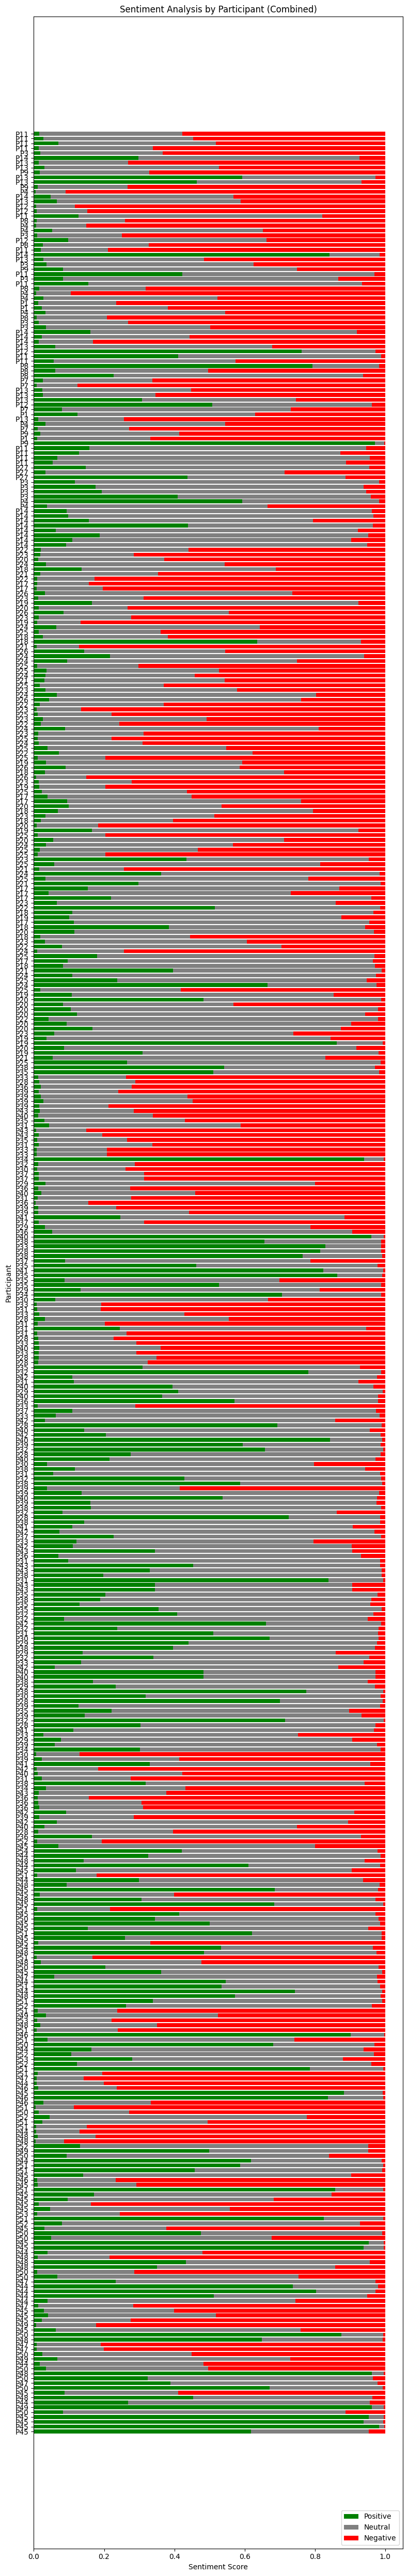

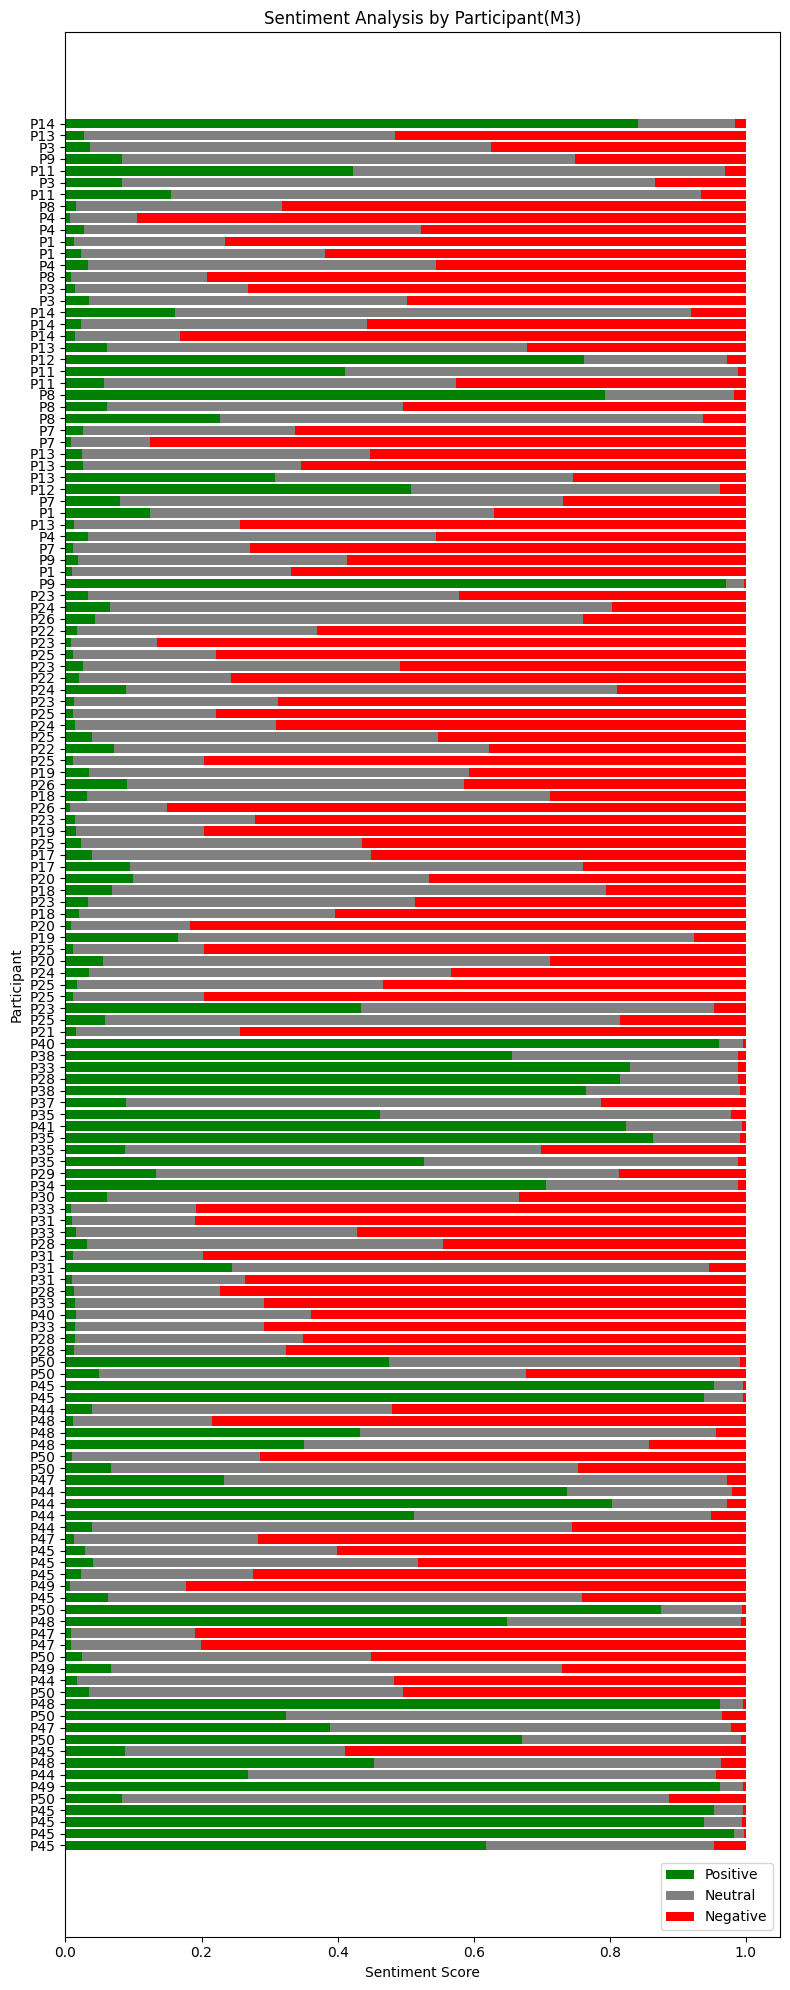

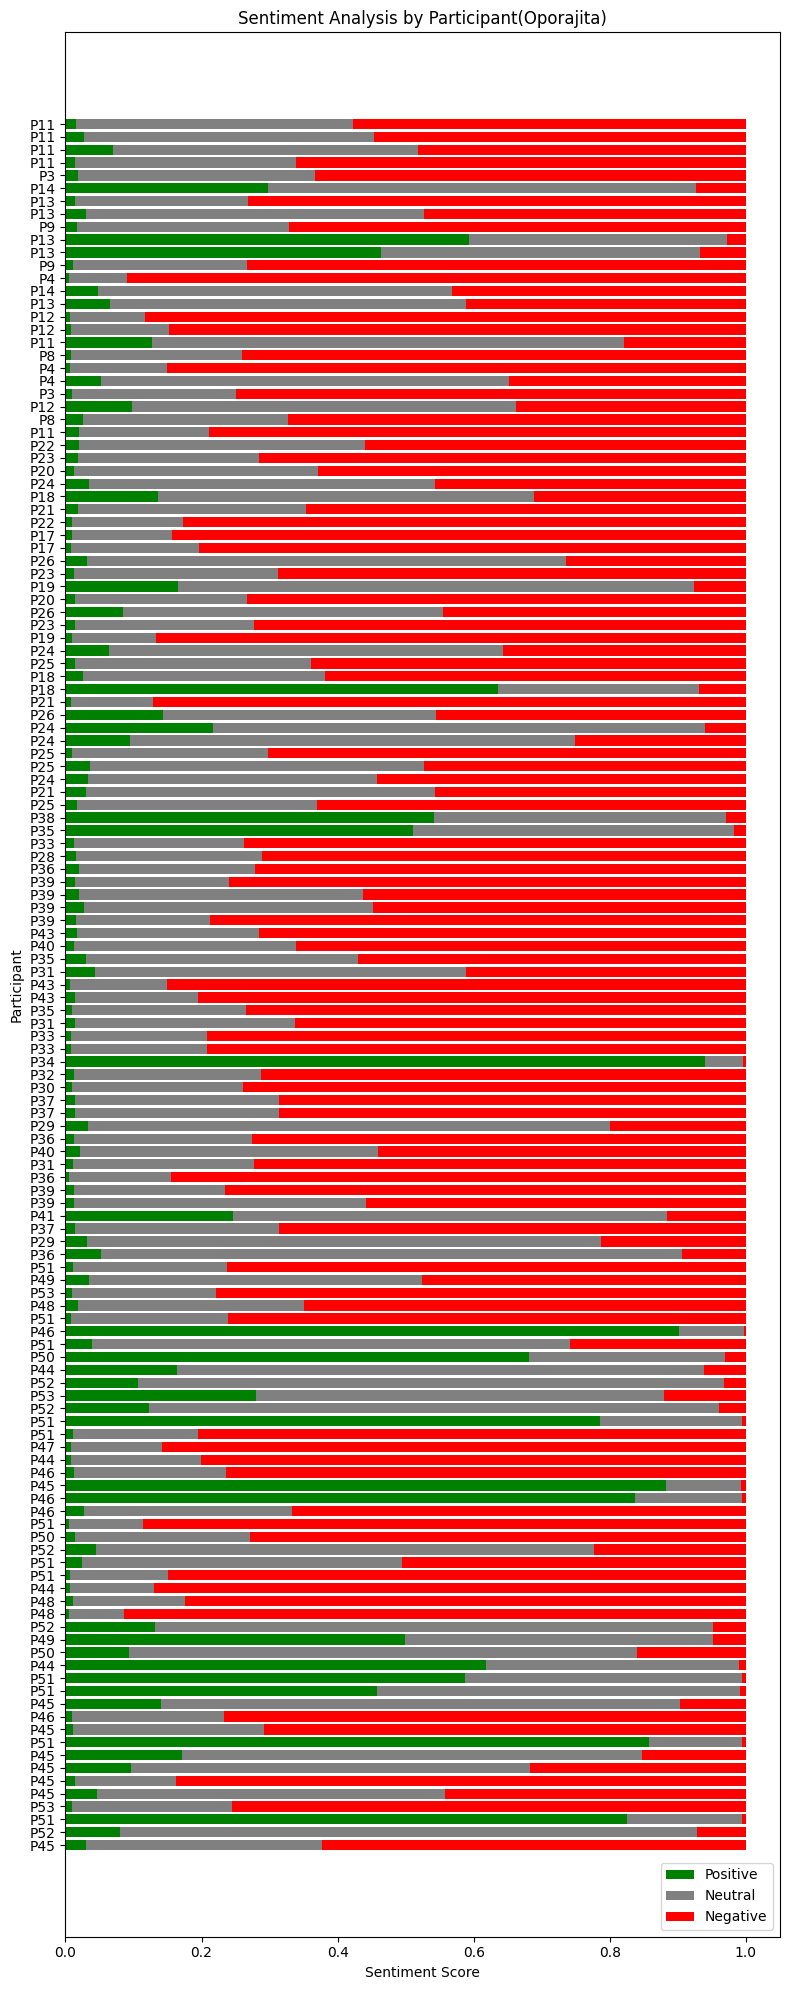

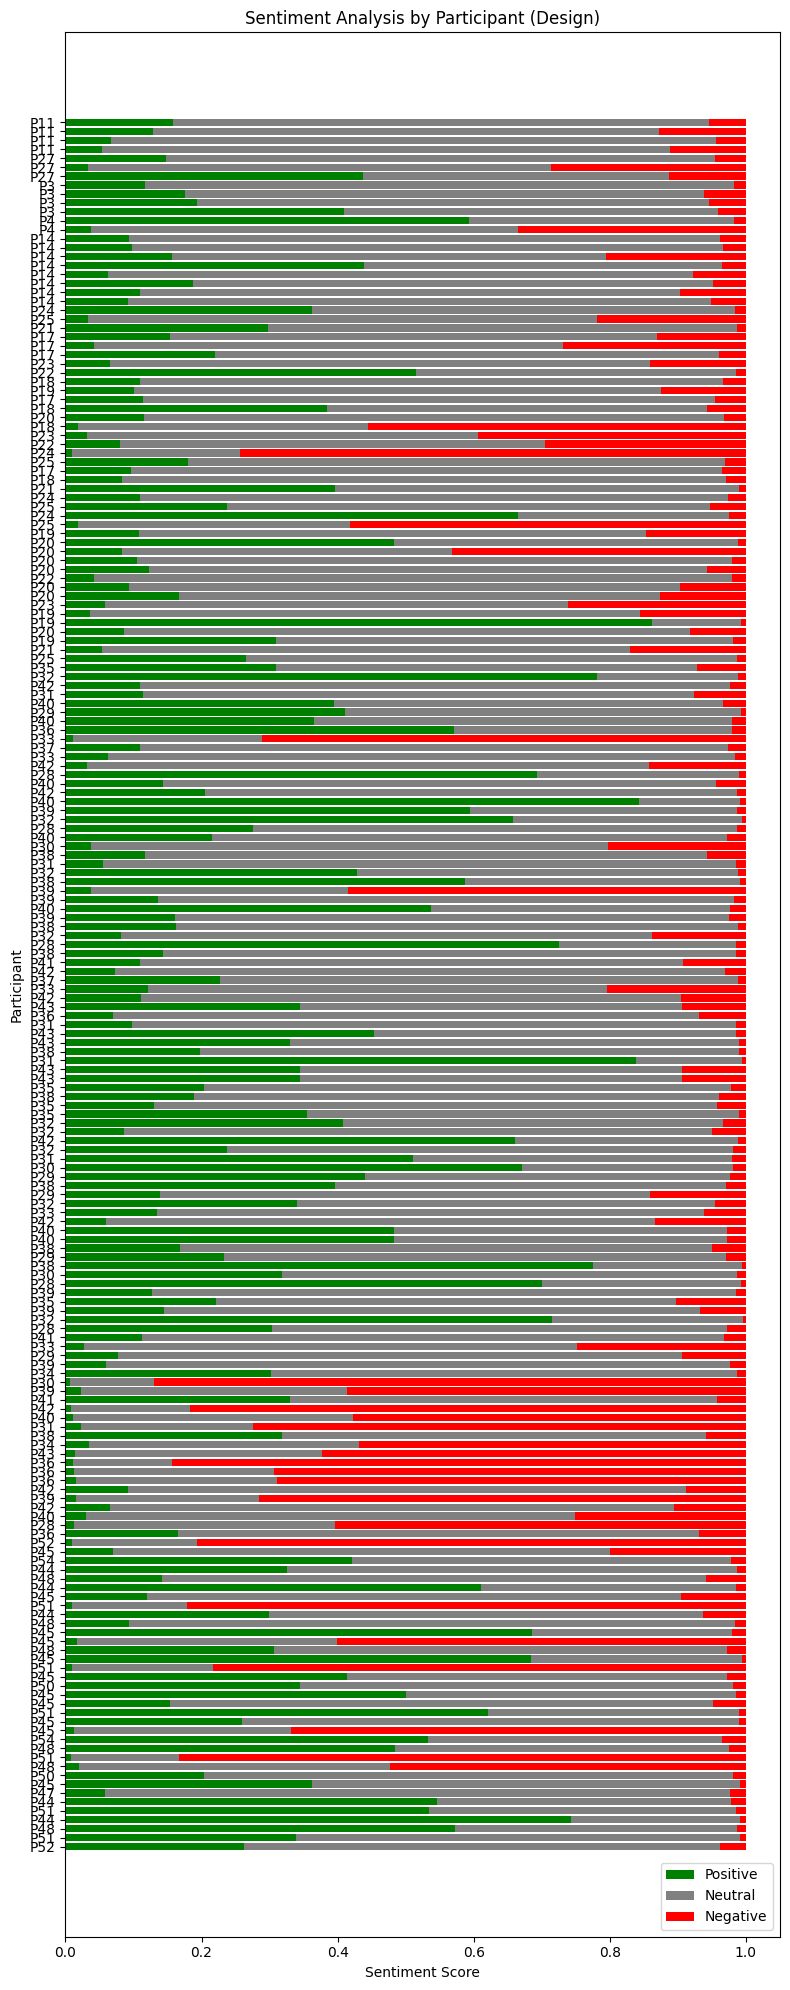

In [12]:
df = sn_combined_df
import matplotlib.pyplot as plt

import numpy as np

# Stacked bar chart
plt.figure(figsize=(8, 50))

# Create an array of y-coordinates for each participant
y = np.arange(len(df))

# Iterate through each row in the DataFrame
for i, row in df.iterrows():
    participant = row['Participant']
    plt.barh(y[i], row['Sentiment_Positive'], color='green', label='Positive' if i == 0 else None)
    plt.barh(y[i], row['Sentiment_Neutral'], left=row['Sentiment_Positive'], color='grey', label='Neutral' if i == 0 else None)
    plt.barh(y[i], row['Sentiment_Negative'], left=row['Sentiment_Positive'] + row['Sentiment_Neutral'], color='red', label='Negative' if i == 0 else None)

plt.xlabel('Sentiment Score')
plt.ylabel('Participant')
plt.title('Sentiment Analysis by Participant (Combined)')
plt.legend(loc='lower right')
plt.yticks(y, df['Participant'])  # Set y-ticks to participant names
plt.tight_layout()
plt.show()

df = sn_m3_df
# Stacked bar chart
plt.figure(figsize=(8, 20))

# Create an array of y-coordinates for each participant
y = np.arange(len(df))

# Iterate through each row in the DataFrame
for i, row in df.iterrows():
    participant = row['Participant']
    plt.barh(y[i], row['Sentiment_Positive'], color='green', label='Positive' if i == 0 else None)
    plt.barh(y[i], row['Sentiment_Neutral'], left=row['Sentiment_Positive'], color='grey', label='Neutral' if i == 0 else None)
    plt.barh(y[i], row['Sentiment_Negative'], left=row['Sentiment_Positive'] + row['Sentiment_Neutral'], color='red', label='Negative' if i == 0 else None)

plt.xlabel('Sentiment Score')
plt.ylabel('Participant')
plt.title('Sentiment Analysis by Participant(M3)')
plt.legend(loc='lower right')
plt.yticks(y, df['Participant'])  # Set y-ticks to participant names
plt.tight_layout()
plt.show()

df = sn_oporajita_df


# Stacked bar chart
plt.figure(figsize=(8, 20))

# Create an array of y-coordinates for each participant
y = np.arange(len(df))

# Iterate through each row in the DataFrame
for i, row in df.iterrows():
    participant = row['Participant']
    plt.barh(y[i], row['Sentiment_Positive'], color='green', label='Positive' if i == 0 else None)
    plt.barh(y[i], row['Sentiment_Neutral'], left=row['Sentiment_Positive'], color='grey', label='Neutral' if i == 0 else None)
    plt.barh(y[i], row['Sentiment_Negative'], left=row['Sentiment_Positive'] + row['Sentiment_Neutral'], color='red', label='Negative' if i == 0 else None)

plt.xlabel('Sentiment Score')
plt.ylabel('Participant')
plt.title('Sentiment Analysis by Participant(Oporajita)')
plt.legend(loc='lower right')
plt.yticks(y, df['Participant'])  # Set y-ticks to participant names
plt.tight_layout()
plt.show()

df = sn_design_df

# Stacked bar chart
plt.figure(figsize=(8, 20))

# Create an array of y-coordinates for each participant
y = np.arange(len(df))

# Iterate through each row in the DataFrame
for i, row in df.iterrows():
    participant = row['Participant']
    plt.barh(y[i], row['Sentiment_Positive'], color='green', label='Positive' if i == 0 else None)
    plt.barh(y[i], row['Sentiment_Neutral'], left=row['Sentiment_Positive'], color='grey', label='Neutral' if i == 0 else None)
    plt.barh(y[i], row['Sentiment_Negative'], left=row['Sentiment_Positive'] + row['Sentiment_Neutral'], color='red', label='Negative' if i == 0 else None)

plt.xlabel('Sentiment Score')
plt.ylabel('Participant')
plt.title('Sentiment Analysis by Participant (Design)')
plt.legend(loc='lower right')
plt.yticks(y, df['Participant'])  # Set y-ticks to participant names
plt.tight_layout()
plt.show()